<a href="https://colab.research.google.com/github/Nijina-T/Machine-Learning/blob/main/lung_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LUNG CANCER PREDICTION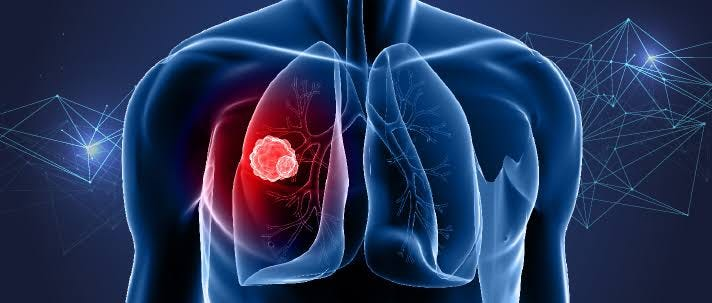**

**IMPORTING LIBRARIES**

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

**DATASET LOADING**

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/lung_cancer_examples.csv')
df

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1
5,Cristiano,Ronaldo,34,0,10,0,0
6,Mihail,Tal,58,15,10,0,0
7,Kathy,Bates,22,12,5,2,0
8,Nicole,Kidman,45,2,6,0,0
9,Ray,Milland,52,18,4,5,1


**DATA PREPROCESSING**

In [3]:
# dropping unwanted columns
df.drop(['Name','Surname'],axis=1,inplace=True)
df

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1
5,34,0,10,0,0
6,58,15,10,0,0
7,22,12,5,2,0
8,45,2,6,0,0
9,52,18,4,5,1


In [4]:
#checking missing values
df.isna().sum()

Age       0
Smokes    0
AreaQ     0
Alkhol    0
Result    0
dtype: int64

In [5]:
#checking data type
df.dtypes

Age       int64
Smokes    int64
AreaQ     int64
Alkhol    int64
Result    int64
dtype: object

**SEPARATING FEATURES AND TARGET**

In [8]:
x=df.iloc[:,:-1]
x

,Age,Smokes,AreaQ,Alkhol
0,35,3,5,4
1,27,20,2,5
2,30,0,5,2
3,28,0,8,1
4,68,4,5,6
5,34,0,10,0
6,58,15,10,0
7,22,12,5,2
8,45,2,6,0
9,52,18,4,5


In [9]:
y=df.iloc[:,-1]
y

0     1
1     1
2     0
3     0
4     1
5     0
6     0
7     0
8     0
9     1
10    0
11    0
12    0
13    1
14    1
15    0
16    1
17    0
18    1
19    1
20    1
21    0
22    0
23    0
24    1
25    0
26    0
27    0
28    1
29    1
30    0
31    1
32    1
33    1
34    0
35    0
36    1
37    1
38    0
39    0
40    1
41    0
42    1
43    1
44    0
45    0
46    0
47    0
48    1
49    1
50    0
51    1
52    1
53    0
54    0
55    1
56    1
57    1
58    0
Name: Result, dtype: int64

**SCALING**

In [10]:
scaler=MinMaxScaler()
scaler.fit(x)
x_scaled=scaler.transform(x)
x_scaled

array([[0.28813559, 0.08823529, 0.44444444, 0.5       ],
       [0.15254237, 0.58823529, 0.11111111, 0.625     ],
       [0.20338983, 0.        , 0.44444444, 0.25      ],
       [0.16949153, 0.        , 0.77777778, 0.125     ],
       [0.84745763, 0.11764706, 0.44444444, 0.75      ],
       [0.27118644, 0.        , 1.        , 0.        ],
       [0.6779661 , 0.44117647, 1.        , 0.        ],
       [0.06779661, 0.35294118, 0.44444444, 0.25      ],
       [0.45762712, 0.05882353, 0.55555556, 0.        ],
       [0.57627119, 0.52941176, 0.33333333, 0.625     ],
       [0.25423729, 0.11764706, 0.77777778, 0.        ],
       [0.        , 0.29411765, 0.55555556, 0.375     ],
       [0.11864407, 0.05882353, 0.44444444, 0.125     ],
       [0.16949153, 0.58823529, 0.11111111, 1.        ],
       [0.27118644, 0.73529412, 0.33333333, 1.        ],
       [0.3559322 , 0.52941176, 0.77777778, 0.125     ],
       [0.40677966, 0.64705882, 0.22222222, 0.625     ],
       [0.01694915, 0.35294118,

**TRAIN-TEST-SPLIT**

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=1)

In [12]:
x_train.shape,y_train.shape

((41, 4), (41,))

In [13]:
x_test.shape,y_test.shape

((18, 4), (18,))

**MODEL CREATION**

In [14]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
y_pred=knn.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0])

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         7

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

